## Step 1: Data Preprocessing
1.1. Handling Missing Values 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the Excel file
df = pd.read_csv("EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [15]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [16]:
df.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [17]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [19]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [20]:
df.isnull().sum()  # Check for missing values

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [21]:
# Option to handle missing values
df.fillna(df.mean(), inplace=True)  # Filling with mean values

In [22]:
# Alternatively, remove rows/columns if data is sparse
df.dropna(inplace=True)

## 1.2. Removing Outliers
Identify outliers using methods like the Z-score or IQR (Interquartile Range) and remove them to improve clustering quality.

In [24]:
from scipy import stats
z_scores = stats.zscore(df)
df_clean = df[(abs(z_scores) < 3).all(axis=1)]  # Removing outliers using Z-score

In [25]:
z_scores

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [26]:
df_clean

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## 1.3. Scaling the Data
Features need to be scaled for clustering algorithms (K-Means and DBSCAN), as they are sensitive to the scale of data. Use StandardScaler for this purpose.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

In [28]:
scaler

StandardScaler()

In [29]:
df_scaled

array([[-1.76632543, -0.52326043, -0.15886912, ..., -0.43177507,
         1.43143767, -0.71809304],
       [-1.76546049, -0.66708419, -0.15886912, ..., -0.43177507,
         1.41584783, -0.71809304],
       [-1.76459555, -0.30974703, -0.15886912, ..., -0.43177507,
         1.44800188, -0.71809304],
       ...,
       [ 1.70900444,  0.21135753, -0.15886912, ..., -0.43177507,
        -1.29581034,  1.3925772 ],
       [ 1.70986938, -0.0908356 , -0.15886912, ...,  0.11817002,
        -1.29629752, -0.71809304],
       [ 1.71073432, -0.9293577 , -0.15886912, ..., -0.43177507,
        -1.29775907, -0.71809304]])

## Step 2: Exploratory Data Analysis (EDA)
Perform initial visualizations such as histograms, boxplots, and pair plots to understand data distribution, identify trends, and gain insight into potential clusters.


c:\Users\Aqsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Aqsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Aqsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Aqsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

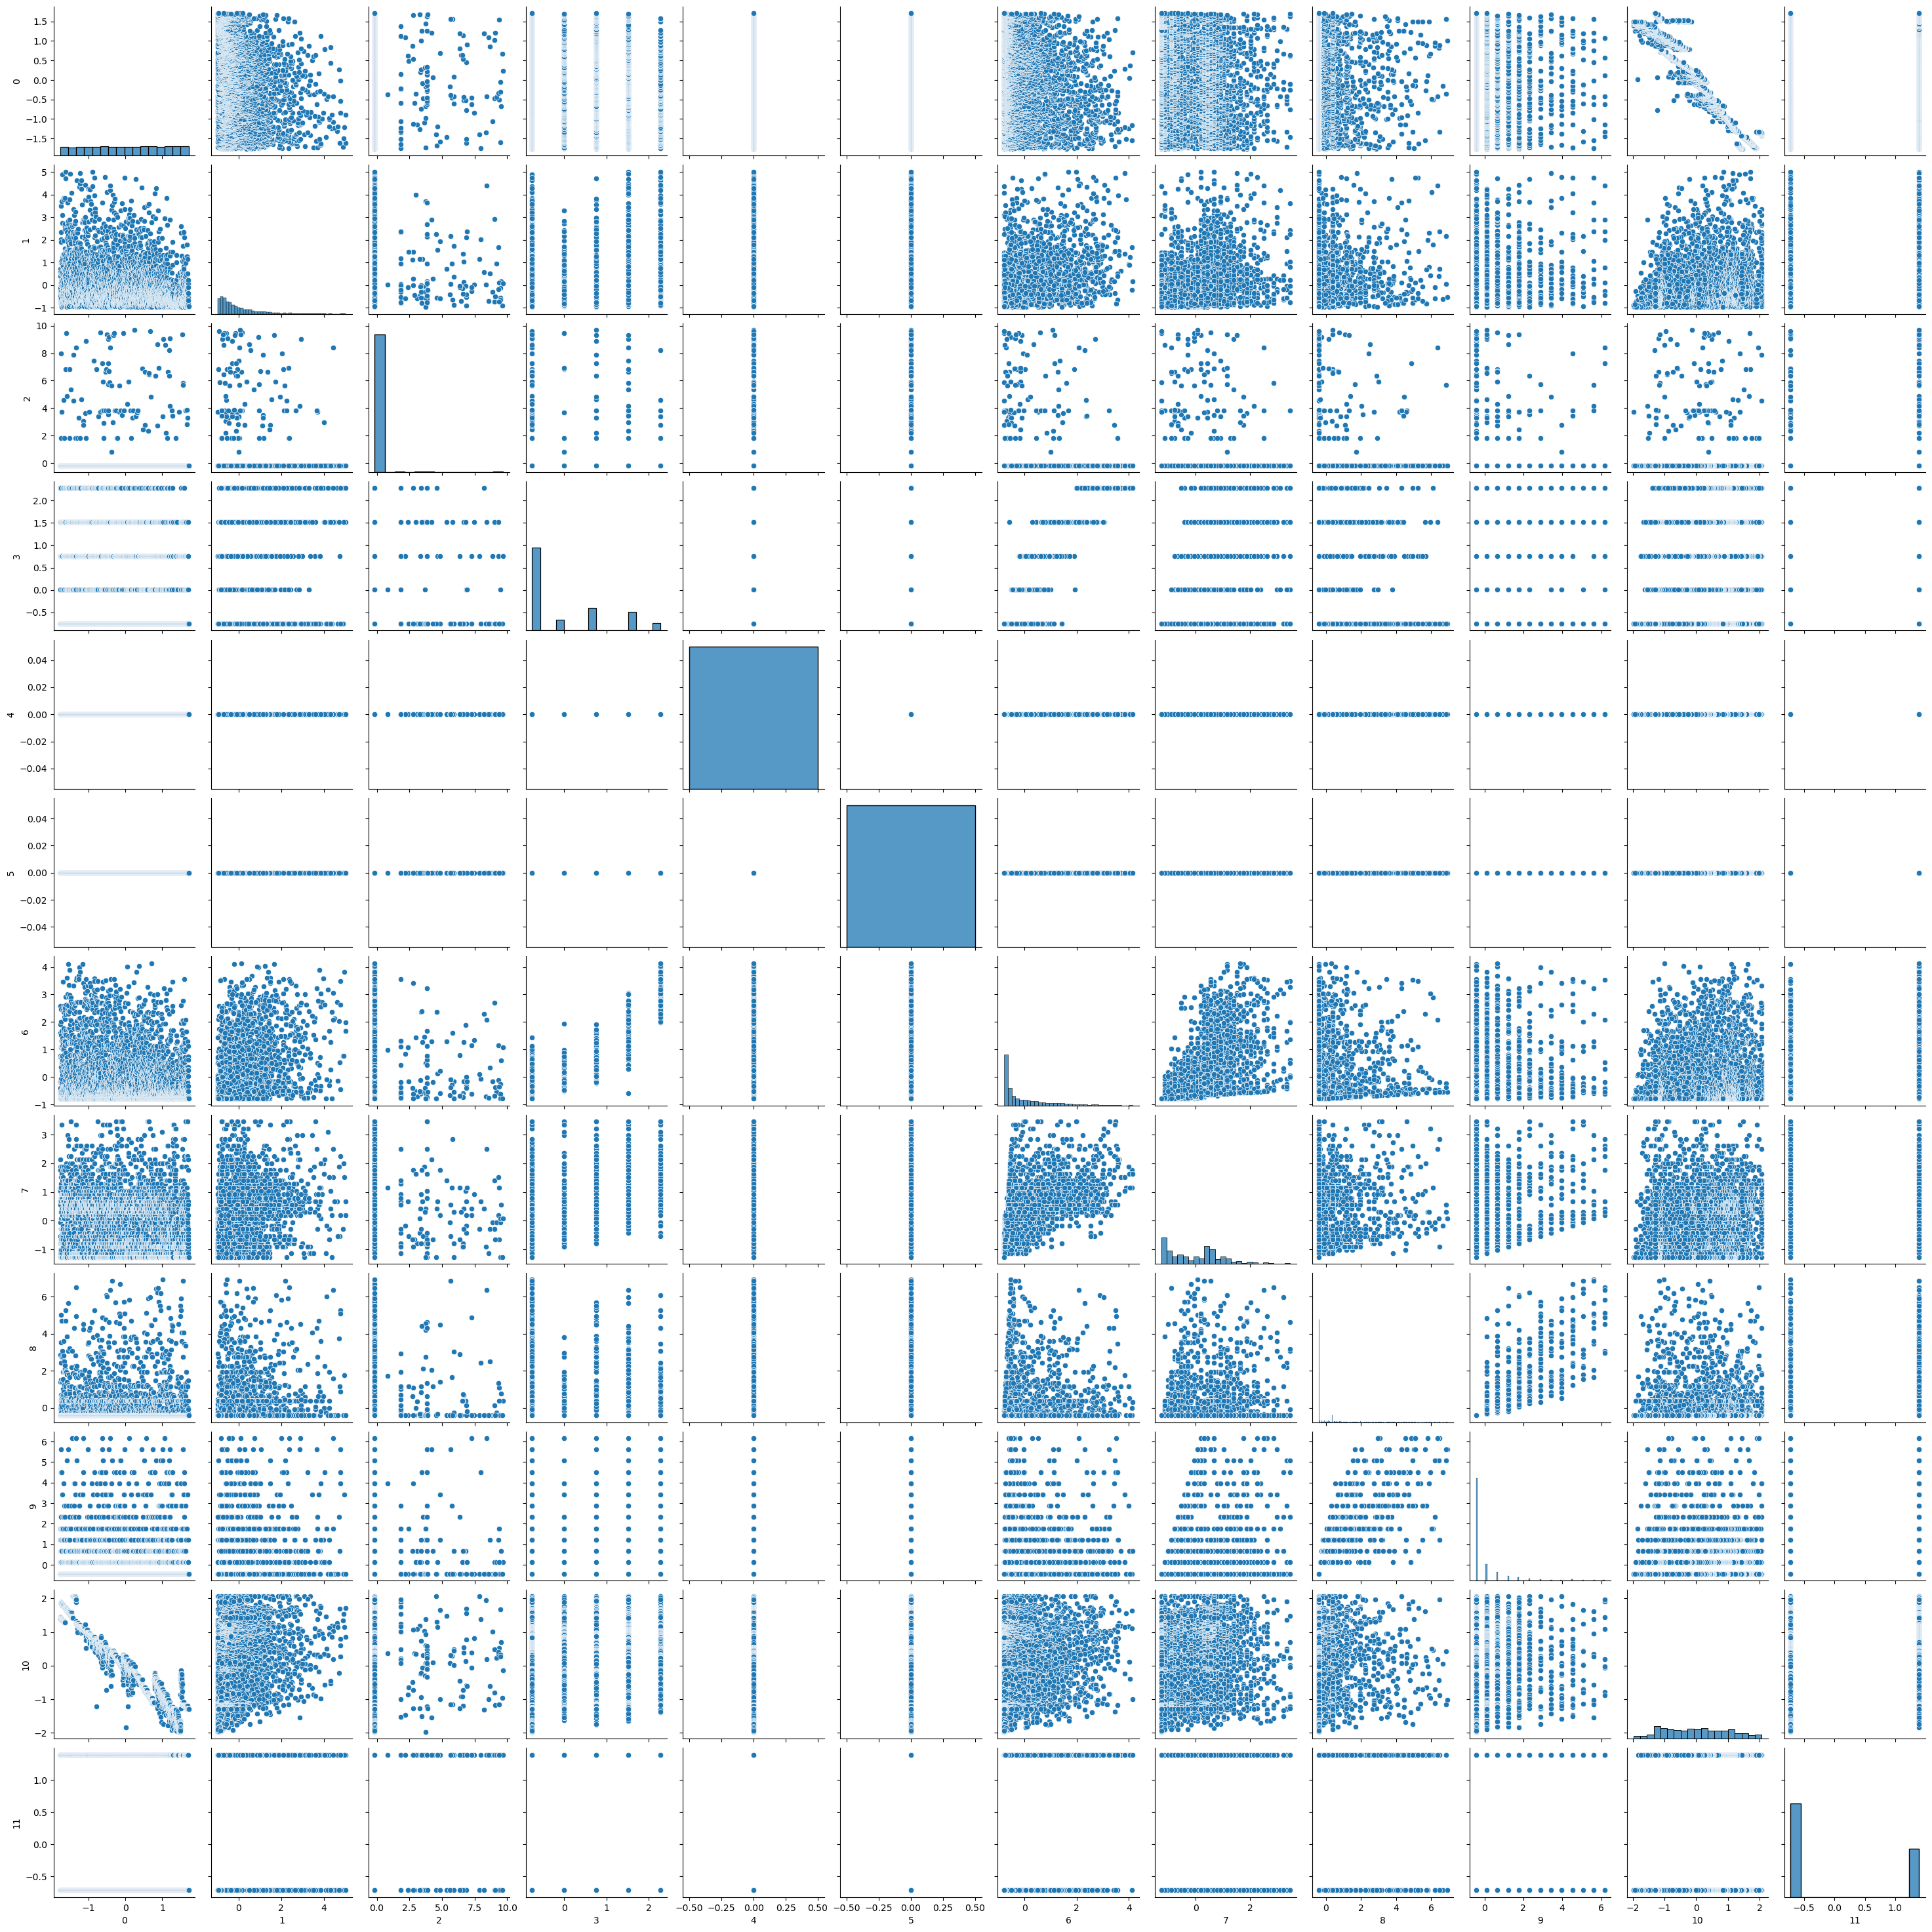

In [30]:
sns.pairplot(pd.DataFrame(df_scaled))  # Pair plot for identifying relationships
plt.show()

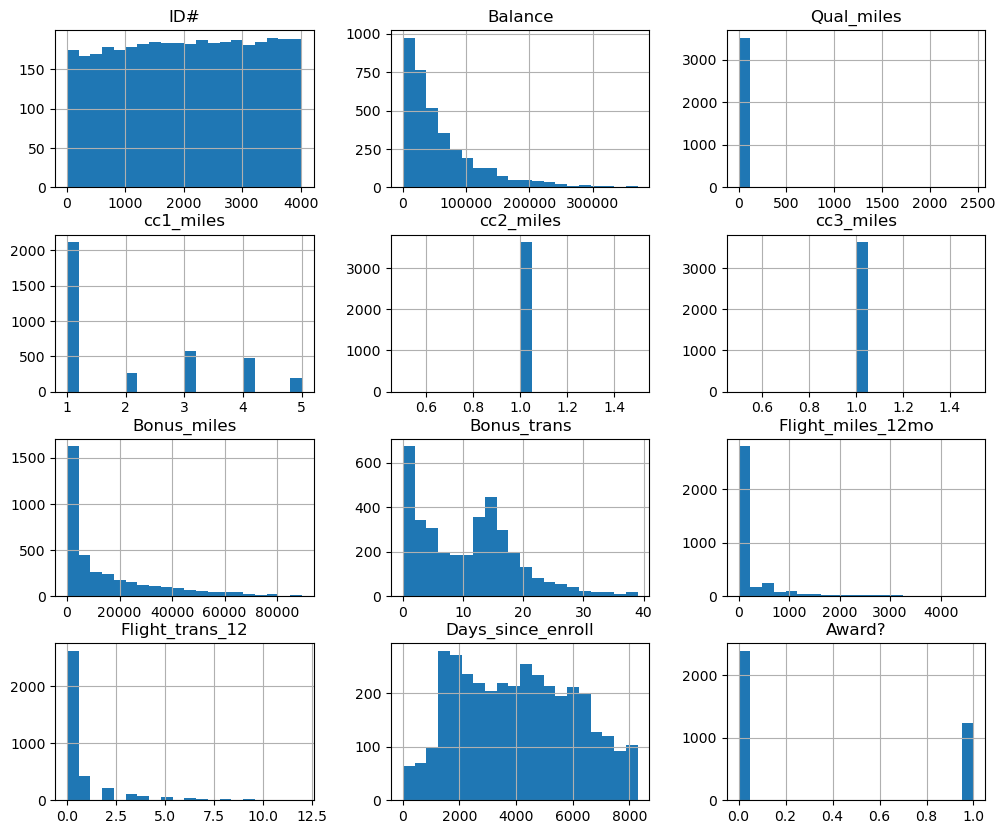

In [32]:
# Distribution analysis using histograms
df_clean.hist(figsize=(12, 10), bins=20)
plt.show()

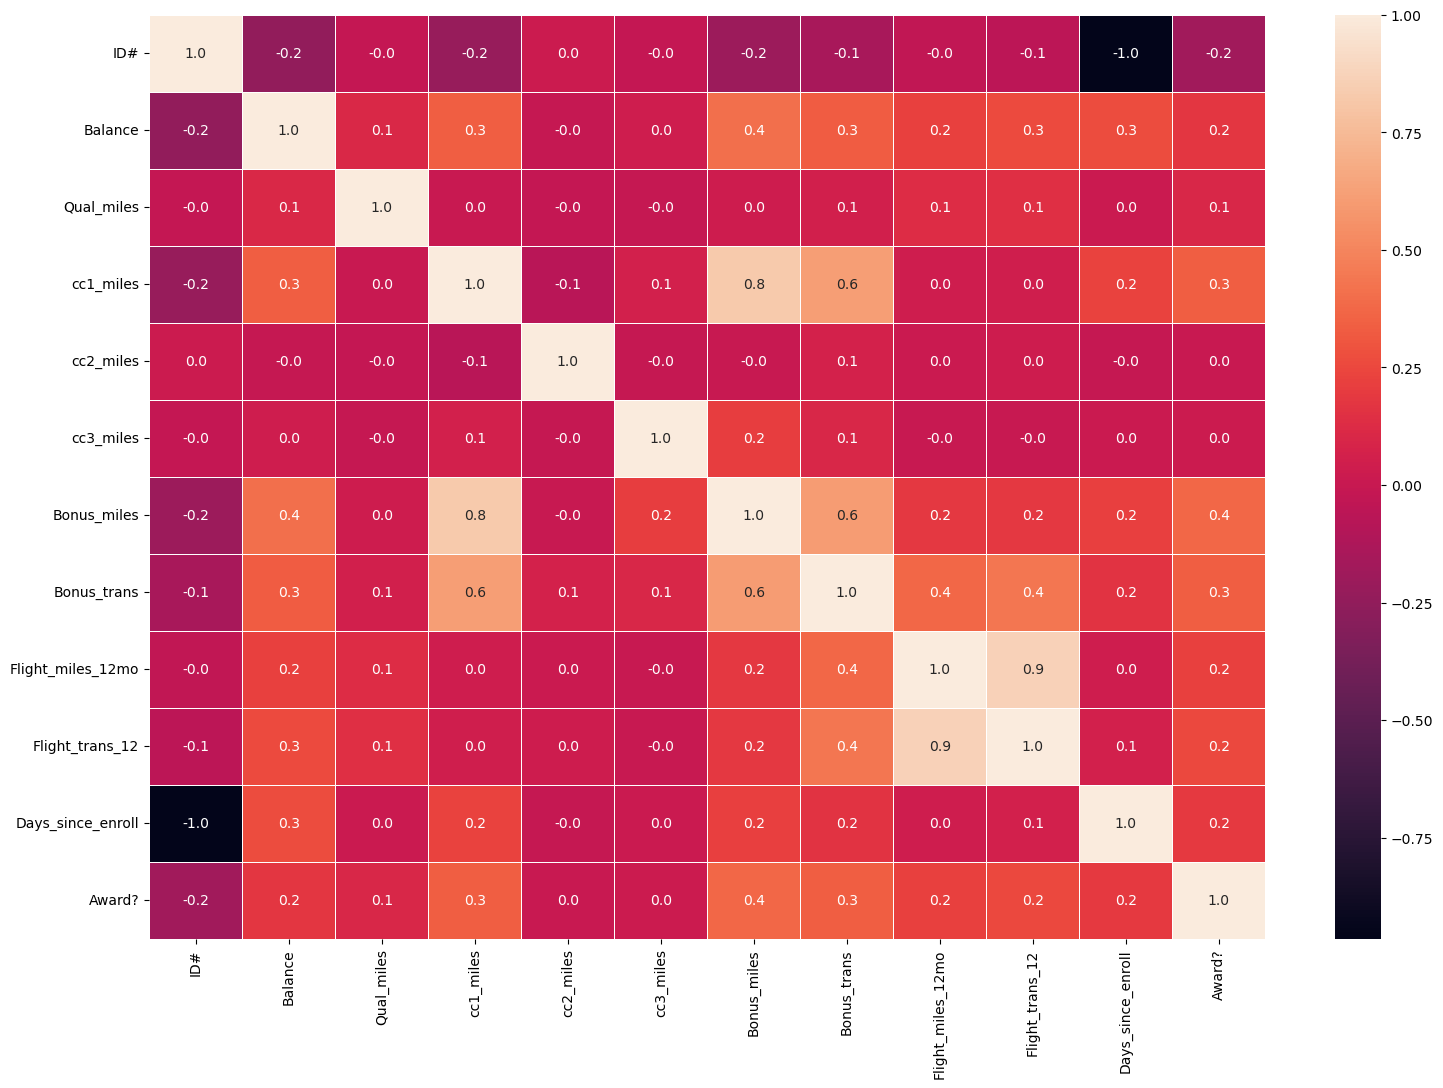

In [61]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

## Step 3: Implementing Clustering Algorithms
## 3.1. K-Means Clustering

K-Means involves specifying the number of clusters, K. Use the Elbow Method to find the optimal number of clusters.

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [34]:
# Elbow Method to determine optimal K
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

c:\Users\Aqsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Aqsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Aqsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Aqsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Aqsa\anaconda3\Lib\site-packages\sklearn\cluster\_k

In [35]:
sse

[36300.0,
 27865.99060969994,
 23394.32975966281,
 19963.52348165735,
 17329.552077866843,
 15808.311477292376,
 14750.753627110855,
 13817.888984675305,
 13138.99949427622,
 12440.228507305666]

In [36]:
kmeans

KMeans(n_clusters=10)

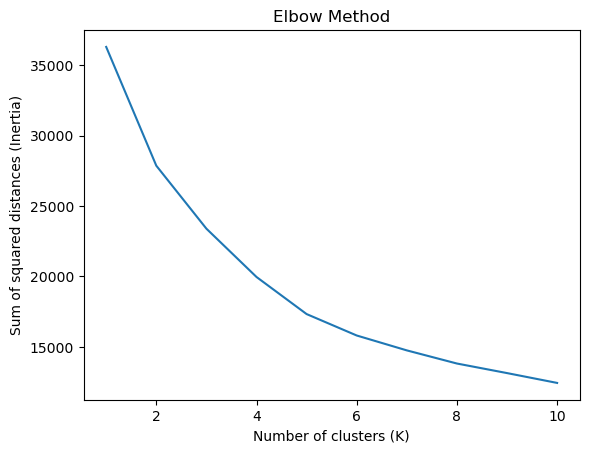

In [37]:
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method')
plt.show()

In [39]:
# Implement K-Means with optimal K
kmeans = KMeans(n_clusters=3)  # Assuming 3 is optimal from Elbow Curve
kmeans.fit(df_scaled)
labels_kmeans = kmeans.labels_

c:\Users\Aqsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
labels_kmeans 

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
# Evaluate using silhouette score
silhouette_kmeans = silhouette_score(df_scaled, labels_kmeans)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

Silhouette Score for K-Means: 0.2920590974033667


## 3.2. Hierarchical Clustering
Hierarchical clustering can be done using different linkage methods (ward, complete, average). A dendrogram helps visualize cluster formation.

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(df_scaled, method='ward')

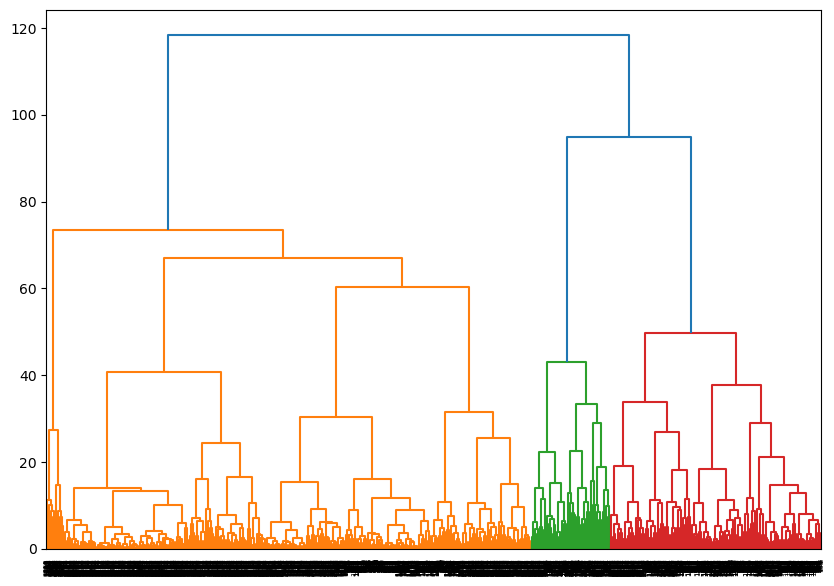

In [45]:
# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()

In [46]:
# Applying Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels_hc = hc.fit_predict(df_scaled)

c:\Users\Aqsa\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [47]:
hc

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [48]:
labels_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
# Silhouette score for hierarchical clustering
silhouette_hc = silhouette_score(df_scaled, labels_hc)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hc}')

Silhouette Score for Hierarchical Clustering: 0.26359050526851413


## 3.3. DBSCAN Clustering
DBSCAN clusters based on the density of data points. The parameters eps (radius) and minPts (minimum points per cluster) are crucial.

In [50]:
from sklearn.cluster import DBSCAN

# DBSCAN with tuned parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(df_scaled)

In [51]:
dbscan

DBSCAN()

In [52]:
# Evaluate using silhouette score
silhouette_dbscan = silhouette_score(df_scaled, labels_dbscan)
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

Silhouette Score for DBSCAN: -0.3994552312980999


## Step 4: Cluster Analysis and Interpretation
After applying each algorithm, analyze the characteristics of the clusters by examining the centroids, group statistics, and cluster sizes.

In [53]:
# Analyzing the clusters of K-Means
cluster_centers = kmeans.cluster_centers_
cluster_labels_kmeans = kmeans.labels_
print(pd.DataFrame(cluster_centers, columns=df.columns))

        ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0  0.248747 -0.386693   -0.049671  -0.614319        0.0        0.0   
1 -0.441497  0.593798   -0.009870   1.140319        0.0        0.0   
2 -0.100947  0.592335    0.481406   0.014163        0.0        0.0   

   Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0    -0.569397    -0.520529          -0.250887        -0.242872   
1     1.003621     0.828119          -0.177473        -0.179853   
2     0.263982     0.661813           3.032057         2.973064   

   Days_since_enroll    Award?  
0          -0.258361 -0.320542  
1           0.453817  0.468600  
2           0.127168  0.602127  


In [54]:
# For hierarchical clustering, check cluster sizes
print(pd.Series(labels_hc).value_counts())

0    2272
1     987
2     371
Name: count, dtype: int64


## Step 5: Visualization of Clustering Results
Visualize the clusters for each algorithm using scatter plots and color differentiation for clusters.

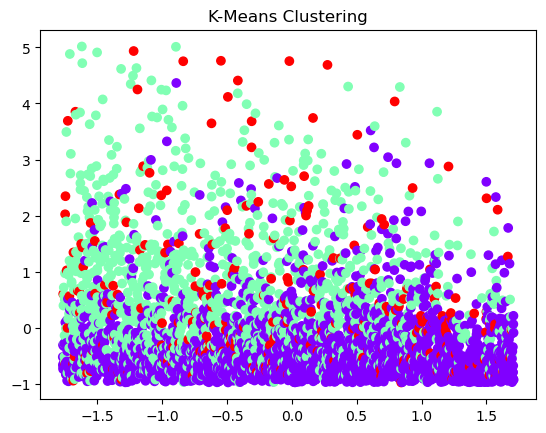

In [56]:
# Visualizing K-Means clusters
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels_kmeans, cmap='rainbow')
plt.title('K-Means Clustering')
plt.show()

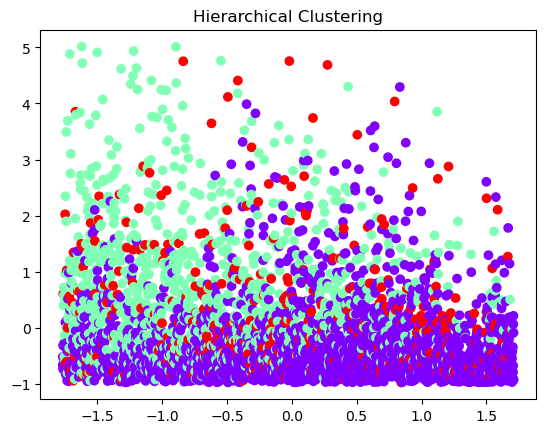

In [57]:
# Visualizing Hierarchical Clustering
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels_hc, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.show()

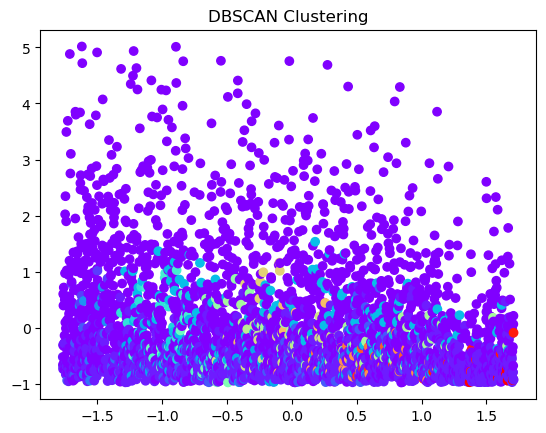

In [58]:
# Visualizing DBSCAN Clusters
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels_dbscan, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.show()

## Step 6: Evaluation and Performance Metrics
Evaluate the quality of the clusters using silhouette score, which measures how similar a point is to its own cluster versus other clusters.

In [59]:
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hc}')
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

Silhouette Score for K-Means: 0.2920590974033667
Silhouette Score for Hierarchical Clustering: 0.26359050526851413
Silhouette Score for DBSCAN: -0.3994552312980999


## Final Insights

K-Means is suitable for compact, well-separated clusters.

The Elbow Method helps in choosing the optimal number of clusters.

Hierarchical clustering gives a detailed understanding of the data hierarchy, though it may not scale well with large datasets.

DBSCAN works well for datasets with varying densities and can identify noise points (outliers).